# Анализ продаж видеоигр

## Введение

**Общее описание проекта:** В нашем распоряжении исторические данные из открытых источников   о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Наша задача - выделить закономерности, которые позволят определить потенциально популярный продукт и спланировать маркетинговые кампании магазина "Стримчик", который продает видеоигры по всему миру.

**Цель проекта:** Определить потенциально популярный продукт с помощью анализа данных за прошлые периоды.

**Описание данных:** В нашем распоряжении датасет `'games.csv'`, в котором столбцы содержат следующие данные:
- `'Name'` — название игры
- `'Platform'` — платформа
- `'Year_of_Release'` — год выпуска
- `'Genre'` — жанр игры
- `'NA_sales'` — продажи в Северной Америке (миллионы проданных копий)
- `'EU_sales'` — продажи в Европе (миллионы проданных копий)
- `'JP_sales'` — продажи в Японии (миллионы проданных копий)
- `'Other_sales'` — продажи в других странах (миллионы проданных копий)
- `'Critic_Score'` — оценка критиков (максимум 100)
- `'User_Score'` — оценка пользователей (максимум 10)
- `'Rating'` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работ:**
- Изучить данные
- Провести предобработку данных (обработать названия столбцов, обработать пропущенные значения, устранить явные и неявные дубликаты, обработать типы данных)
- Провести исследовательский анализ данных (определить периоды, данные по которым важны для результатов исследования, сравнить продажи в разрезе платформ, определить тренды (по каким платформам продажи растут, а где падают), изучить влияние отзывов критиков и пользователей на продажи, изучить самые популярные с точки зрения продаж жанры)
- Составить портрет пользователя каждого региона
- Проверить статистические гипотезы: 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action и Sports разные
- Составить общий вывод, предоставить рекомендации

## Изучение данных

Выведем первые 10 строк исходного датафрейма для знакомства с данными, а также общую информацию 

In [1]:
# Импорты
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1hnnTrYFnLoGouWRaDsFYdn72FOMnl6W2')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**
- Необходимо привести к змеиному регистру названия столбцов
- В данных есть пропуски, которые необходимо обработать
- Необходимо обработать типы данных в столбцах:
    - `'Year_of_Release'` - значения можно преобразовать в целые числа
    - `'User_Score'` - необходимо преобразовать в тип данных 'float'

## Предобработка данных

### Изменение названий столбцов

Приведем названия столбцов к змеиному регистру, выведем на экран новые названия столбцов

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов приведены к общепринятому стилю.

### Обработка пропущенных значений

Выведем информацию о пропусках по каждому столбцу

In [6]:
# Переменная для хранения количества строк датафрейма до удаления пропусков
count_before_dropping_na = data.shape[0]

# Поместим данные о пропусках (кол-во пропусков и доля пропусков среди всех строк) в таблицу
report = data.isna().sum().to_frame()
report.columns = ['amount']
report['share'] = report['amount'] / data.shape[0]
report

,amount,share
name,2,0.000120
platform,0,0.000000
year_of_release,269,0.016093
genre,2,0.000120
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,0.513192
user_score,6701,0.400897


Пропуски в столбцах `'critic_score'`, `'user_score'` составляют достаточно большой процент (51%, 40%) от всех данных, поэтому их заполнение приведет к искажению результатов. Оставим их как есть, но не будем учитывать в анализе.

А вот пропуски в столбцах `'name'`, `'year_of_release'`, `'genre'` составляют достаточно низкий процент среди всех доступных данных. Для удобства устраним их. Снова выведем таблицу с количеством и долями пропусков в каждом столбце

Пропуски в столбце `'rating'` составляют 40.4% от всех данных. Изучив, что рейтинг ESRB составляется только для Канады и США, пропуски в данных для нас означают релиз не в Северной Америке. Заполним пропуски заглушкой `'no rating'` там, где продажи в СА равны нулю

In [7]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data.loc[(data['na_sales'] == 0) & (data['rating'].isna()), 'rating'] = 'no rating'

report = data.isna().sum().to_frame()
report.columns = ['amount']
report['share'] = report['amount'] / data.shape[0]
report

,amount,share
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8461,0.514534
user_score,6605,0.401666


Пропуски удалены. Теперь посчитаем, какую долю от исходных данных мы потеряли, чтобы убедиться, что удалили не слишком много данных.

In [8]:
print(f'Потеряно {(count_before_dropping_na - data.shape[0]) / count_before_dropping_na:.2%} от всех данных')

Потеряно 1.62% от всех данных


Мы потеряли 1.62% от всех данных, значение небольшое, можем двигаться дальше.

Прежде чем переходить к преобразованию типов данных, необходимо детальнее изучить значения столбца `'user_score'`. Выведем уникальные значения

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков в значениях, в данных присутствуют ячейки со значением `'tbd'`. Изучим эти данные

In [10]:
data.loc[data['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Значение `'tbd'` обычно трактуется, как `'подлежит уточнению'`, поэтому для нас эти значения равносильны пропускам. Заменим их на пропуски

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

report = data.isna().sum().to_frame()
report.columns = ['amount']
report['share'] = report['amount'] / data.shape[0]
report

,amount,share
name,0,0.000000
platform,0,0.000000
year_of_release,0,0.000000
genre,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8461,0.514534
user_score,8981,0.546157


**Вывод:**
- Устранены пропуски в столбцах `'name'`, `'year_of_release'`, `'genre'`
- Значения `'tbd'` столбца `'user_score'` заменены на пропуски, так как для нас это равносильно
- Пропуски в столбцах `'critic_score'`, `'user_score'`, решено оставить как есть, так как они составляют достаточно большой процент от всех данных и их замена может исказить результаты исследования
- Пропуски в столбце `'rating'` заполнены заглушкой там, где продажи в СА равны нулю
- Пропуски, скорее всего, возникли случайно

### Обработка дубликатов

Найдем количество явных дубликатов в данных

In [12]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Проверим, есть ли неявные дубликаты в столбце `'genre'`

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявные дубликаты отсутвтвуют.

Проверим, есть ли неявные дубликаты в столбце `'rating'`

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'no rating', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Неявные дубликаты отсутствуют

Проверим, нет ли неявных дубликатов по имени, платформе и году выпуска

In [15]:
duplicated_data = data.loc['name':'year_of_release'].duplicated().sum()
duplicated_data

0

Неявные дубликаты отсутствуют

**Вывод:**
- Явные дубликаты отсутствуют
- Неявные дубликаты в столбцах `'genre'` и `'rating'` отсутствуют
- Неявные дубликаты по имени, платформе и году выпуска отсутствуют

### Обработка типов данных

Преобразуем типы данных:

`'year_of_release'` - в целые числа

`'user_score'` - в вещественные числа

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           13456 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Типы данных преобразованы.

### Суммарные продажи

Добавим в таблицу новый столбец `'total_sales'`, который будет содержать информацию о суммарных продажах во всех трех регионах.

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Столбец добавлен.

In [18]:
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           13456 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

**Общий вывод по Предобработке данных:**
- Названия столбцов приведены к нижнему регистру
- Пропущенные значения, скорее всего, возникли случайно
- Пропущенные значения в столбцах `'name'`, `'year_of_release'`, `'genre'` удалены.
- Пропущенные значения в столбцах `'critic_score'`, `'user_score'` решено оставить как есть, так как их замена может исказить результаты исследования
- Пропуски в столбце  `'rating'` заполнены заглушкой там, где продажи в СА равны нулю, так как возникли из-за того, что рейтинг мог не присваиваться, если игра не продавалась в США и Канаде
- Значения `'tbd'` столбца `'user_score'` заменены на пропуски, так как это обозначение `'подлежит уточнению'`, а для нас это равносильно пропуску
- В данных отсутствуют явные и неявные дубликаты
- Обработаны типы данных
- Добавлен столбец `'total_sales'`, который хранит общую выручку со всех регионов

## Исследовательский анализ данных

В текущем разделе будут рассмотрены следующие вопросы:
- Рассмотрим, сколько игр выпускалось в разные годы. Ответим на вопрос: **Важны ли данные за все периоды?**
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: **За какой характерный срок появляются новые и исчезают старые платформы?**
- Возьмем данные за соответствующий актуальный период для построения прогноза на 2017 год:
    - Не учитываем в работе данные за предыдущие годы
    - Определим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
    - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
    - Соотнесем выводы с продажами игр на других платформах
    - Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльне и самые не прибыльные жанры

### Рассмотрим, сколько игр выпускалось в разные годы

Сгруппируем данные по годам выпуска, построим столбчатую диаграму на основе этих данных

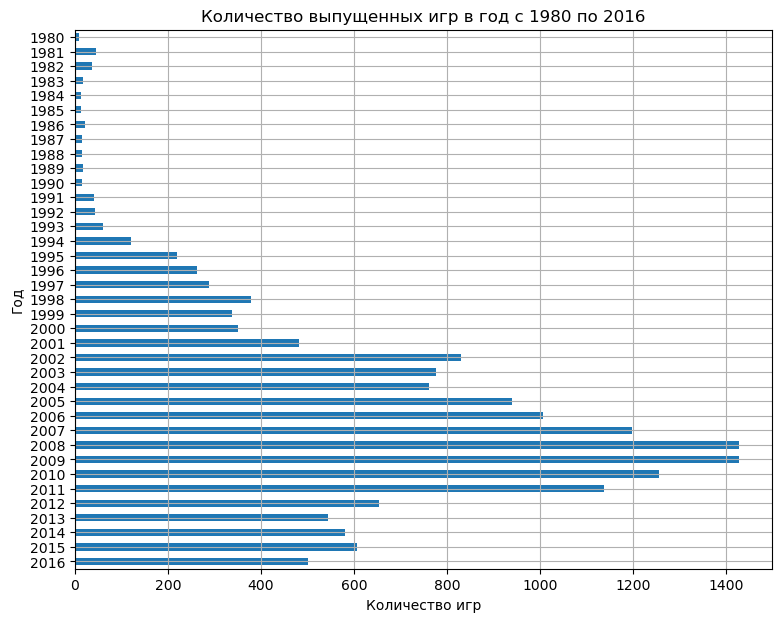

In [19]:
grouped_by_year = (data.pivot_table(index='year_of_release', values='name', aggfunc='count')
                   .sort_values(by='year_of_release', ascending=False)
                   .rename(columns={'name': 'amount'})
                   .reset_index())
grouped_by_year.plot(kind='barh', y='amount', x='year_of_release', legend=False, figsize=(9,7), grid=True)
plt.title('Количество выпущенных игр в год с 1980 по 2016')
plt.ylabel('Год')
plt.xlabel('Количество игр')
plt.show()

**Анализ графика**
- На графике присутствует пик в 2008 и 2009 годах со знчением около 1450 выпущенных игр в год
- До 1994 года выпускалось меньше 100 игр в год
- С 1990 года до 2008-2009 года количество выпускаемых игр росло с каждым годом
- После 2001 (500 выпущенных игр) года начался резкий рост до 1450 в 2009
- С 2009 до 2012 года количество выпускаемых ежегодно игр стало снижаться
- С 2012 по 2016 количество ежегодно выпускаемых игр около 600 в год.

### Рассмотрим, как менялись ежегодные продажи по платформам

В данном подразделе получим ответ на вопрос, за какой характерный срок появляются новые и исчезают старые платформы? Ответ будет получен, опираясь на данные по 5 самым популярным платформам.

Сначала определим 5 самых популярных платформ. Для этого сгруппируем данные в сводную таблицу по платформе и просуммируем количество проданных копий игр. Посмотрим на получившуюся таблицу

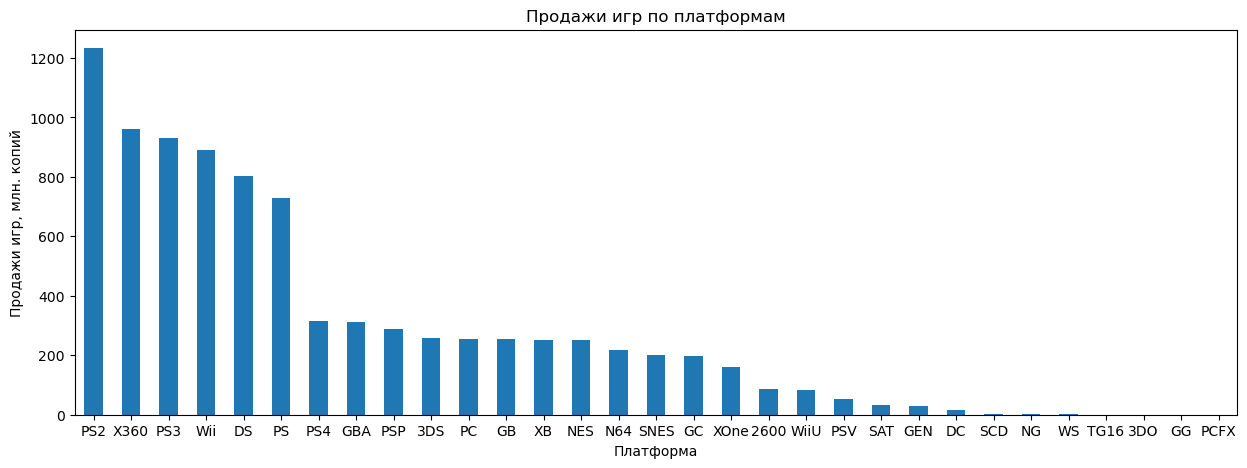

In [20]:
# Найдем 5 самых популярных платформ по общему количеству проданных игр
popular_platforms = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                    .sort_values(by='total_sales', ascending=False))
popular_platforms.plot(kind='bar', y='total_sales', figsize=(15,5), legend=False)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи игр, млн. копий')
plt.xticks(rotation=0)
plt.show()

# Оставим в таблице только 5 самых популярных платформ
popular_platforms = popular_platforms.head(5)

По общему количетсву проданных копий выделяются `PS2`, `XBOX360`, `PS3`, `Wii`, `DS`.

Далее построим графики для каждой платформы с распределением продаж по годам и проведем их анализ. Начнем с 5-го места нашего рейтинга. Для этого нам понадобится дополнительная сводная таблица, которая будет содержать данные о продажах в разрезе каждого года по ранее выделенным самым популярным платформам. Составим таблицу и посмотрим на нее

In [21]:
# Создаем сводную таблицу по ранее выделенным самым популярным платформам с группировкой по годам
platform_pivot = (data.loc[data['platform'].isin(popular_platforms.index)]
                 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
platform_pivot

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


Показатель продаж за 1985 год по платформе `'DS'` выбивается из общей картины, так как за 2000-2003 годы нет данных о продажах игр, потому что платформы до 2004 не существовало. Не будем учитывать эти данные в дальшейшем анализе.

В данных есть пропуски, но для нашего исследования это не страшно - они возникли в результате наших действий и означают, что в этот год на эту платформу игры не выходили, поэтому заменим их нулями.

In [22]:
platform_pivot = platform_pivot.drop(labels=[1985], axis=0)
platform_pivot = platform_pivot.fillna(0)
platform_pivot.isna().sum()

platform
DS      0
PS2     0
PS3     0
Wii     0
X360    0
dtype: int64

Пропуски устранены. Можем переходить к построению графиков. 

Начнем с 5-го места нашего рейтинга - `Nintendo DS`

#### Nintendo DS

Построим график распределения продаж по годам

In [23]:
# Функция для отображения распределения продаж по годам
def display_distr(platform):
    platform_pivot.plot(kind='barh', y=platform, legend=False)
    plt.title(f'Ежегодные продажи игр для платформы {platform}')
    plt.ylabel('Год')
    plt.xlabel('Количество проданных копий, млн.')
    plt.show()

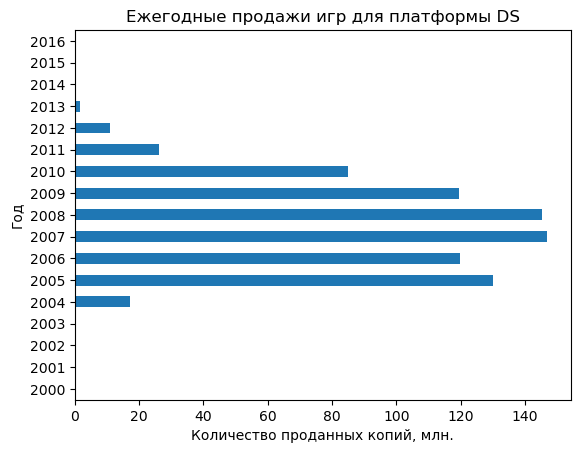

In [24]:
display_distr('DS')

- Продажи резко выросли в 2005, далее держались в районе более 120 млн. копий в год до 2009 года, а в 2010 опустились ниже 100 млн, после чего в 2011 снизились почти до 30. 
- Наблюдается **пиковое значение** в 2007 году, на году после начала активных продаж или на **5-й год продаж** игр на этой платформе
- Высокие продажи игр на платформе **сохранялись на протяжении 3 лет: с 2005 по 2008**, далее последовал **спад**, ставший сильным через 7 лет (на 8 год продаж) после первых продаж

**Вывод:** Пиковые продажи на платформе достигались на протяжении двух лет: 4 и 5 год продаж (150 млн. копий), далее последовал спад. Большое количество продаж наблюдалось со 2-го года продаж по 6-й год продаж (2005-2009, 5 лет). 

С 2013 года продажи на эту платформу сошли на нет.

#### Nintendo Wii

Построим график распределения продаж по годам

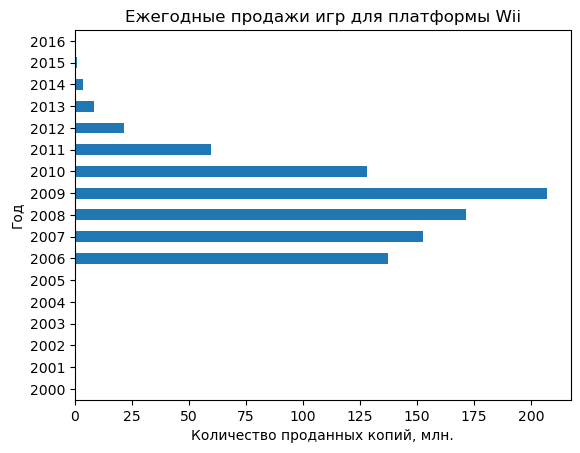

In [25]:
display_distr('Wii')

- Пиковое значение достигается на 4-м году продаж: в 2009 с показателем более 200 млн. копий
- С 1 по 4 годы продаж наблюдался рост, далее последовал достаточно резкий спад с 200 млн. копий до 130 млн.

**Вывод:** 

Пиковое значение достингуто на 4-м году (2009), большое количество продаж (более 100 млн. копий) наблюдалось на протяжении 5 лет (2006-2010), далее количество проданных копий резко упало до 50 и меньше млн. проданных копий.

С 2015 года продажи на эту платформу сошли на нет.

#### PlayStation 3

Построим график распределения продаж по годам

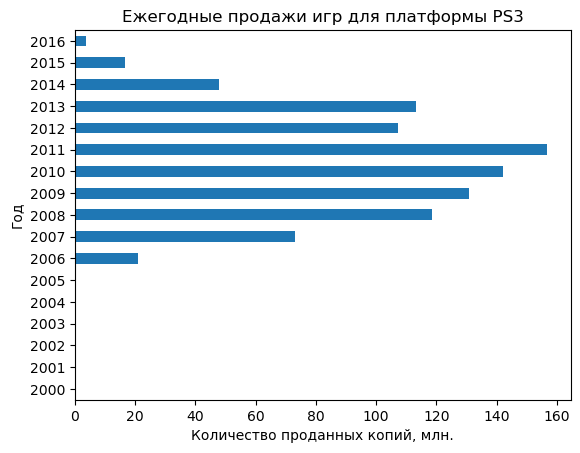

In [26]:
display_distr('PS3')

- Пиковое значение в 2011 - на 6 год после старта продаж, значение 150 млн. проданных копий
- С 1-го года со старта продаж до 6-го количество продаж росло, далее начался спад


**Вывод:**

Пик продаж попал на 6 год после старта продаж. Большое количество копий (100 млн. и более в год) продавалось 4 года - с 3-го по 7-й от старта продаж (2008-2013). 

На 2016 продажи почти сошли к нулю.

#### XBOX360

Построим график распределения продаж по годам

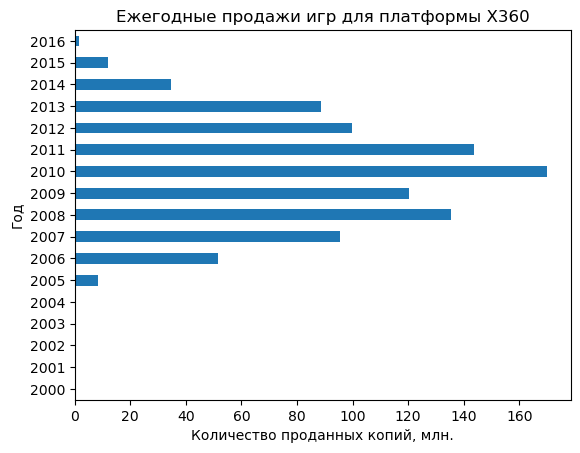

In [27]:
display_distr('X360')

- Пиковое значение достигнуто в 2010 году, продано 170 млн. копий
- С 1-го по 6-й год со старта продаж наблюдался рост (кроме 2009-го, в сравнении с 2008 копий продано меньше, но в 2010 больше, поэтому общий тренд - рост)
- с 7-го года после старта продаж (2011) начался спад, в 2016 продажи почти сошли к нулю

**Вывод:** Пиковое значение в 170 млн. проданных копий достигнуто в 2010 - на 6-й год после начала продаж. Большое количество копий продавалось на протяжении 4 лет: с 4-го года по 7-й (2008-2011), ежегодно продавалось более 100 млн. копий.

В 2016 продажи почти сошли к нулю.

#### PlayStation 2

Построим график распределения продаж по годам

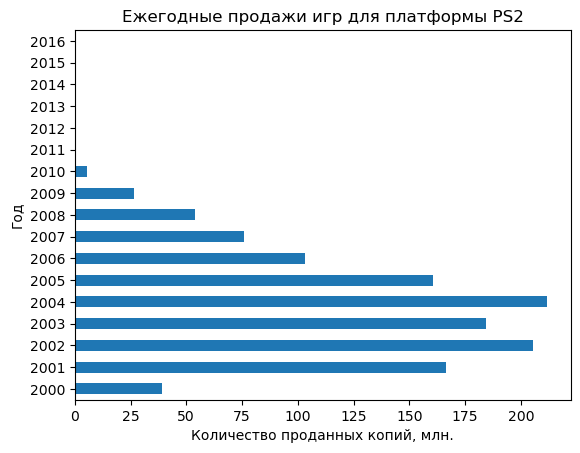

In [28]:
display_distr('PS2')

- Пиковое значение достигается в 2004 года, было продано более 200 млн. копий игр
- С 1-го по 5-й год продажи росли (в 2003 ниже, чем в 2002, но в 2004 больше, поэтому общий тренд - рост)
- С 6-го года продажи начали падать, и на 11-м году прекратились совсем

**Вывод:** Пиковое значение - более 200 млн. копий достигнуто на 5-й год продаж, большое количество продаж наблюдалось на протяжении 5 лет - с 2-го по 7-й год продаж (2001-2006). 

На 2016 год продажи сошли к нулю.

Найдем срок жизни платформы

In [29]:
# Найдем срок жизни платформы
temp = data.copy()
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life['life'].median()

7.0

**Общий вывод по Подразделу:** "Срок жизни" Платформы составляет примерно 7 лет, обычно большее число продаж совершается с 2-го года продаж по 7-й, и продается по 100 млн. копий игр и более. После 7-го года количество продаж сильно сокращается.

### Определение потенциально прибыльных платформ на 2017 год

Как мы выяснили в прошлом подразделе, нас интересуют платформы, для которых 2017 год будет попадать в отрезок от 2-го года со старта продаж до 7-го года со старта продаж, то есть нас интересуют данные за 2010-2016 годы. Рассмотрим, на каких платформах больше всего продаж за эти годы, изучим их распределения продаж по годам, найдем, на каких из платформ мы будем попадать в конец фазы роста или пика популярности.

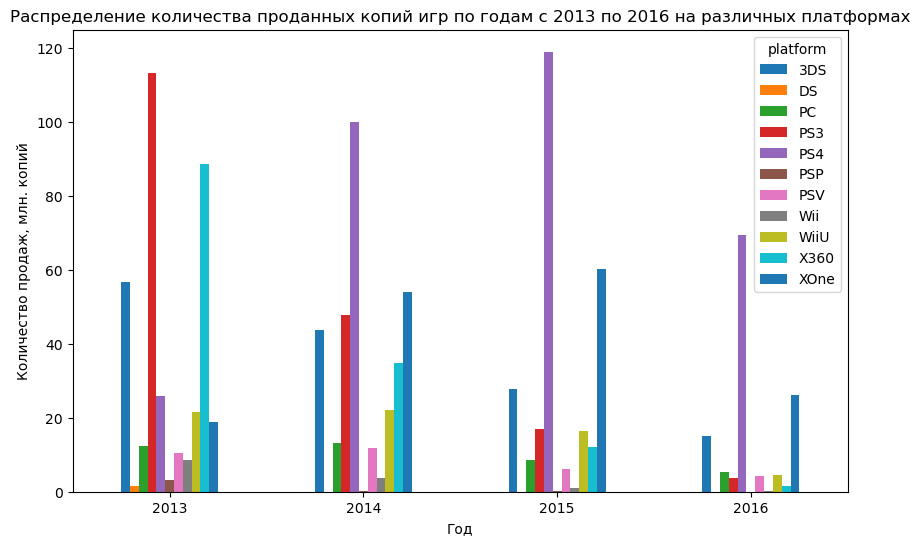

In [30]:
data = data.query('year_of_release >= 2013')
valuable_platforms = (data
                      .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                      .fillna(0))
valuable_platforms.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.title('Распределение количества проданных копий игр по годам с 2013 по 2016 на различных платформах')
plt.ylabel('Количество продаж, млн. копий')
plt.xlabel('Год')
plt.show()

**Вывод:** 
- Начиная с 2014 начали набирать популярность `PS4` и `XOne`. В 2016 данных о продажах чуть меньше, но у нас могут быть не полные данные, поэтому на 2016-2017, вероятно, придется пик или показатель, близкий к пику.
- Популярные ранее PS3, X360, Wii, DS к 2014 уступили свои места и потеряли большую популярность

### Изучение распределения глобальных продаж игр в разбивке по платформам

Построим график "ящик с усами" для продаж по платформам

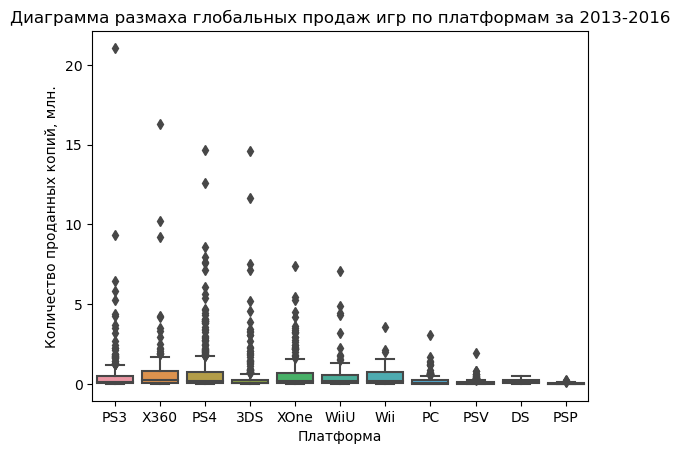

In [31]:
sns.boxplot(data=data, y='total_sales', x='platform')
plt.title('"Ящик с усами" для продаж по платформам за 2013-2016')
plt.ylabel('Количество проданных копий, млн.')
plt.xlabel('Платформа')
plt.title('Диаграмма размаха глобальных продаж игр по платформам за 2013-2016')
plt.show()

График проблематично читать из-за большого количества выбросов. Исправим ситуацию, задав лимит по оси, показывающей количество продаж. Посмотрим на обновленный график 

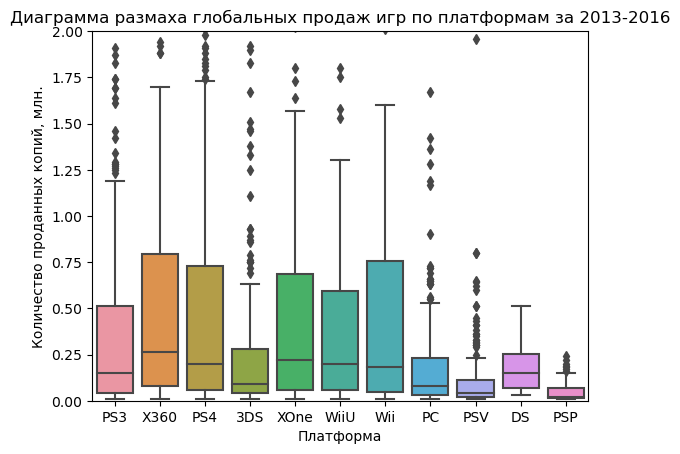

In [32]:
sns.boxplot(data=data, y='total_sales', x='platform')
plt.title('"Ящик с усами" для продаж по платформам за 2013-2016')
plt.ylim(0,2)
plt.ylabel('Количество проданных копий, млн.')
plt.xlabel('Платформа')
plt.title('Диаграмма размаха глобальных продаж игр по платформам за 2013-2016')
plt.show()

**Вывод:**
- Медианное значение продаж на популярных платформах - примерно 0.25 млн. копий, а 75% (3-й квартиль) в районе 0.75 млн.
- Для стабильно популярных платформ большинство значений продаж больше 1 - в большинстве случаев в 1.75 млн. копий (3-й квартиль плюс 1.5 сигмы)

### Изучение зависимости количества продаж от отзывов критиков и пользователей

Построим графики зависимости количества продаж от отзывов критиков и пользоваталей. Анализ будем проводить на данных о продажах игр для `PS3`, так как она самая популярная. Для подкрепления результатов, полученных в результате анализа графиков, выведем также коэффициенты корреляции Пирсона.

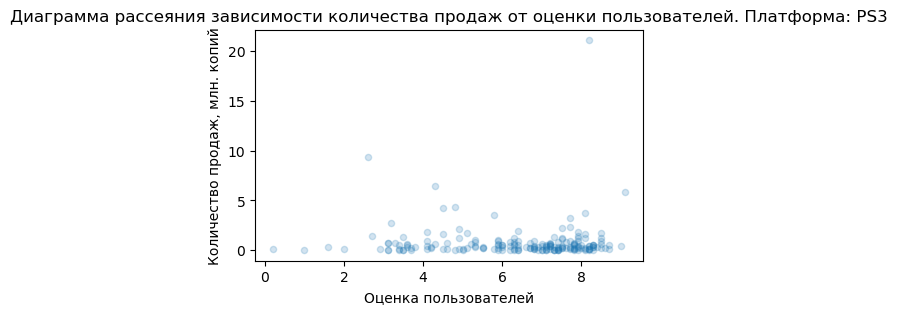

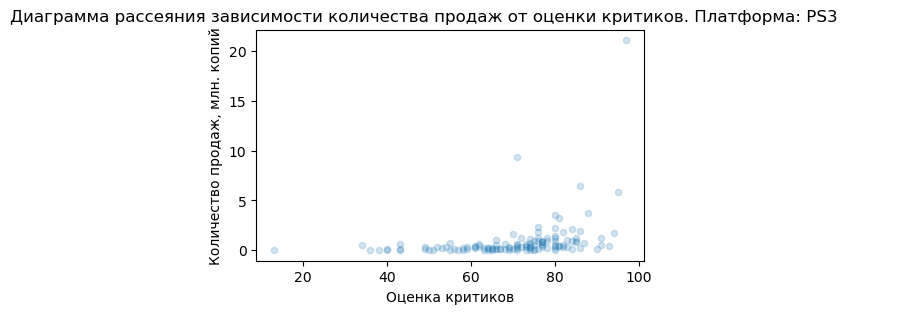

Коэффициент корреляции для отзывов пользователей: 0.0023944027357566907
Коэффициент корреляции для отзывов критиков: 0.3342853393371919


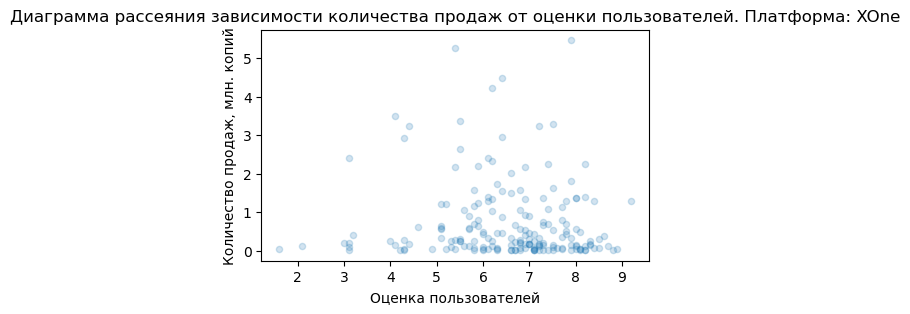

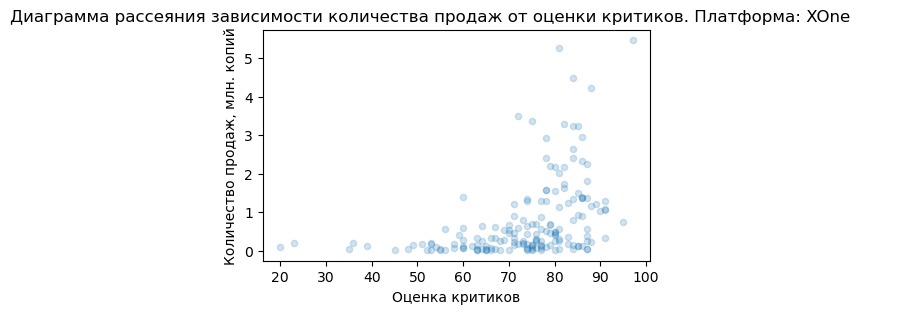

Коэффициент корреляции для отзывов пользователей: -0.06892505328279415
Коэффициент корреляции для отзывов критиков: 0.41699832800840164


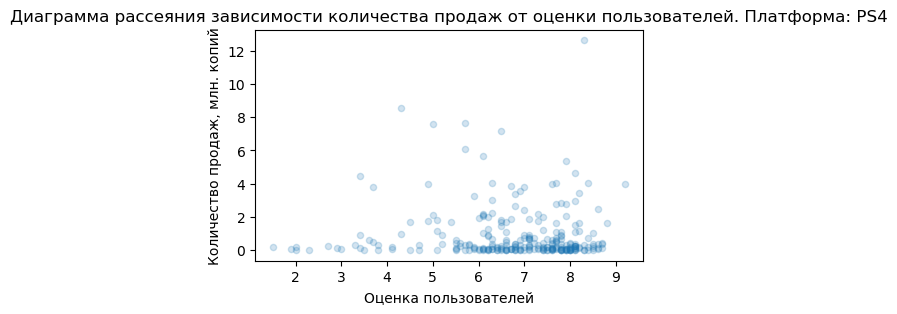

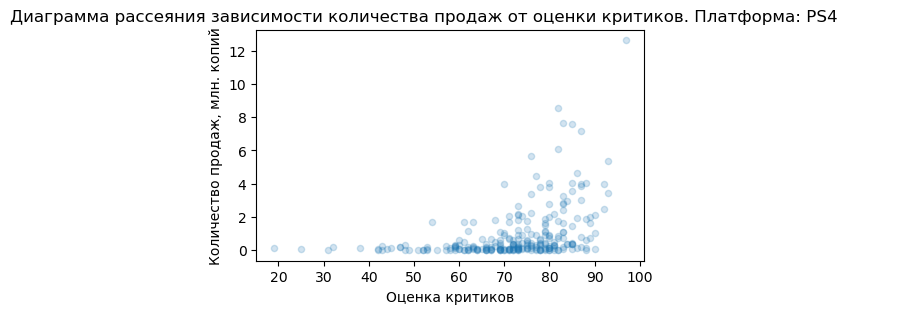

Коэффициент корреляции для отзывов пользователей: -0.03195711020455643
Коэффициент корреляции для отзывов критиков: 0.4065679020617816


In [33]:
platforms_list = ['PS3', 'XOne', 'PS4']

for polular_platform_listed in platforms_list:
    
    popular_platform = polular_platform_listed
    observed_platform = data.query('platform == @popular_platform')
    observed_platform.plot(kind='scatter', y='total_sales', x='user_score', alpha=0.2, figsize=(5,3))
    plt.title(f'Диаграмма рассеяния зависимости количества продаж от оценки пользователей. Платформа: {popular_platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж, млн. копий')
    plt.show()
    
    observed_platform.plot(kind='scatter', y='total_sales', x='critic_score', alpha=0.2, figsize=(5,3))
    plt.title(f'Диаграмма рассеяния зависимости количества продаж от оценки критиков. Платформа: {popular_platform}          ')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж, млн. копий')
    plt.show()
    
    print(f'Коэффициент корреляции для отзывов пользователей: {observed_platform["total_sales"].corr(observed_platform["user_score"])}\nКоэффициент корреляции для отзывов критиков: {observed_platform["total_sales"].corr(observed_platform["critic_score"])}')


- Связь между `отзывами пользователей` и количеством продаж **очень слабая**
- Связь между `отзывами критиков` и количеством продаж **значительно сильнее**, чем между в случае с отзывами пользователей, но все еще **достаточно слабая**.
- Связи иллюстрированы на диаграммах рассеяния, результаты подтверждены числовым коэффициентом корреляции Пирсона.
- Положительные отзывы критиков, хотя и достаточно слабо, но влияют на количество продаж продукта внутри одной платформы.

Далее построим диаграммы рассеяния и отразим зависимость продаж от отзывов критиков и пользователей для **всех продаж на всех платформах**, подкрепляя графики коэффициентом корреляции Пирсона.

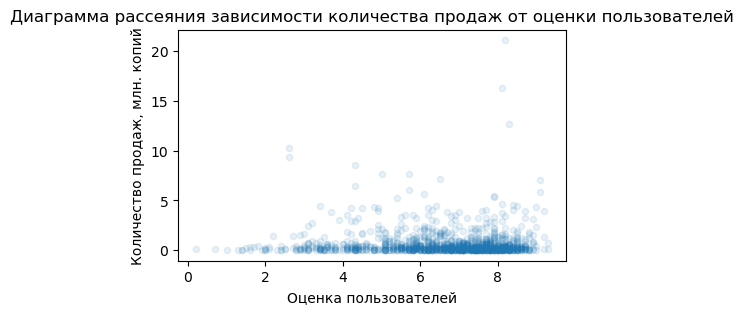

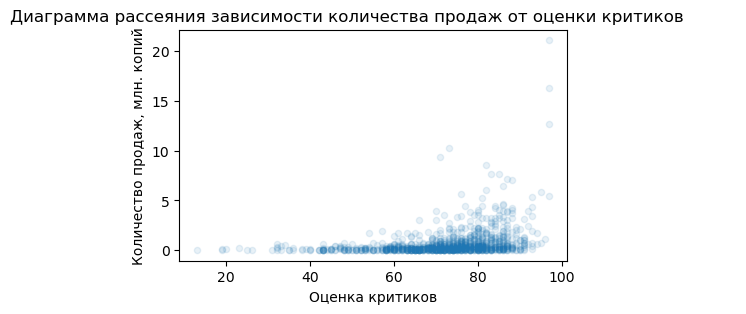

Коэффициент корреляции для отзывов пользователей: -0.0026078133545982688
Коэффициент корреляции для отзывов критиков: 0.3136995151027369


In [34]:
data.plot(kind='scatter', y='total_sales', x='user_score', alpha=0.1, figsize=(5,3))
plt.title('Диаграмма рассеяния зависимости количества продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж, млн. копий')
plt.show()

data.plot(kind='scatter', y='total_sales', x='critic_score', alpha=0.1, figsize=(5,3))
plt.title('Диаграмма рассеяния зависимости количества продаж от оценки критиков          ')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж, млн. копий')
plt.show()

print(f'Коэффициент корреляции для отзывов пользователей: {data["total_sales"].corr(data["user_score"])}\nКоэффициент корреляции для отзывов критиков: {data["total_sales"].corr(data["critic_score"])}')

- Среди всех продаж на всех платформах отзывы пользователей также почти не влияют на количество продаж, как и внутри платформы
- Зависимость между оценкой критиков и количетвом продаж на всех платформах ниже, чем внутри одной платформы, но все еще значильно выше, чем зависимость количества продаж от оценки пользователей.

**Вывод:** Отзывы пользователей незначительно влияют на количество продаж. Положительные отзывы критиков умеренно влияют на количество продаж продукта.

### Изучение зависимости количества продаж от жанра игры

Для определения самых популярных жанров, построим график распределния продаж по каждому жанру, предварительно сгруппировав данные

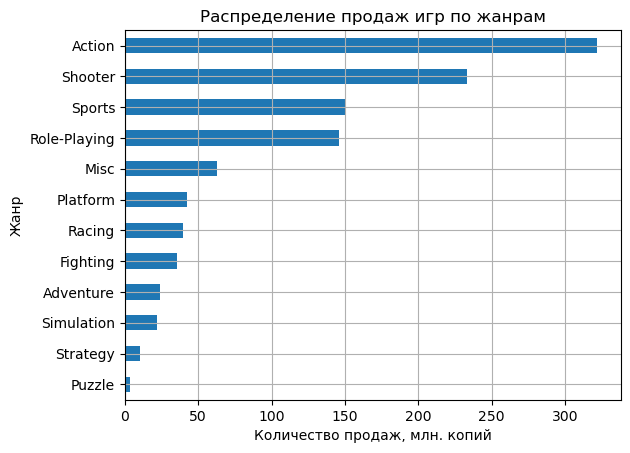

In [35]:
(data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
    .plot(kind='barh', y='total_sales', legend=False, grid=True))
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Количество продаж, млн. копий')
plt.ylabel('Жанр')
plt.show()

Дополнительно проанализируем с помощью диаграмм размаха, какие значения принимают продажи игр в зависимости от жанров

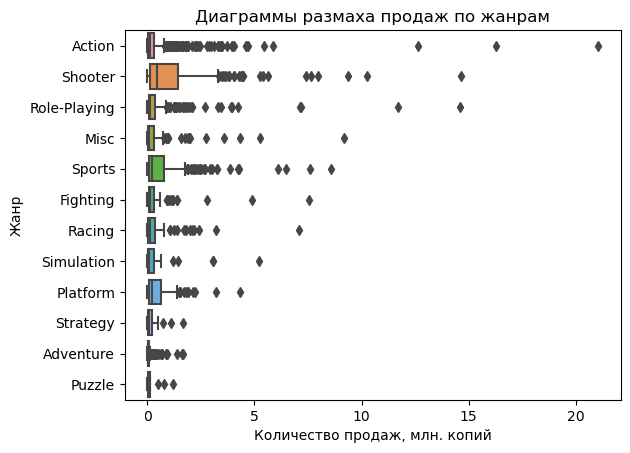

In [36]:
sns.boxplot(data=data, x='total_sales', y='genre', orient='h')
plt.title('Диаграммы размаха продаж по жанрам')
plt.ylabel('Жанр')
plt.xlabel('Количество продаж, млн. копий')
plt.show()

Избавимся об выбросов, обозначим предельное значение по количеству продаж для визуализации

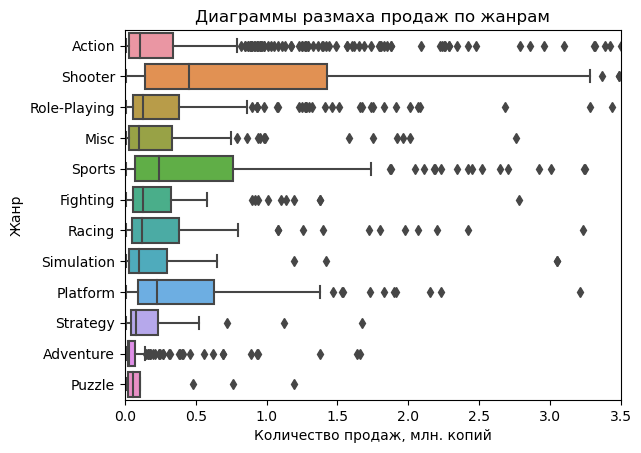

In [37]:
sns.boxplot(data=data, x='total_sales', y='genre', orient='h')
plt.xlim(0,3.5)
plt.title('Диаграммы размаха продаж по жанрам')
plt.ylabel('Жанр')
plt.xlabel('Количество продаж, млн. копий')
plt.show()

- **Самый популярный жанр по количеству продаж** - `Экшн-игры`(**350 млн. проданных копий с 2013 года**)
- На втором месте по популярности `Шутеры` с показателем **230 млн. проданных копий**, а далее идут `Спортивные симуляторы` и `РПГ` с **148 млн. проданных копий**
- **Самые непопулярные** игры - в жанрах `Пазлы`, `Стратегии` (**менее 10 млн. копий продано с 2013**), а далее идут `Приключения` с показателем **менее 5 млн. копий**
- Диаграмма размаха показывает, что популярность Экшн-игр в абсолютном показателе обусловлена большим количеством выбросов - хитов, а в среднем по стабильно высокому показателю уступает Шутерам и Спортивным симуляторам (об этом говорит их медианный показатель продаж (у Шутеров - почти 0.5 млн. проданных копий, у Спортивных симуляторов 0.3), а также третий квартиль (у шутеров - почти 1.5 млн., у спортивных симуляторов около 0.7 млн.)

**Вывод:** Самые перспективные и стабильные жанры - `Шутеры` и `Спортивные симуляторы`.

**Общий вывод по Исследовательскому анализу:**
- Количество выпускаемых ежегодно игр: 
    - С 1990 года до 2008-2009 года количество выпускаемых игр росло с каждым годом
    - После 2001 (500 выпущенных игр) года начался резкий рост до 1450 в 2009
    - С 2009 до 2012 года количество выпускаемых ежегодно игр стало снижаться
    - С 2012 по 2016 количество ежегодно выпускаемых игр около 600 в год.
 - "Срок жизни" Платформы составляет примерно 5 лет, обычно он длится с 2-го года продаж по 7-й, и продается по 100 млн. копий игр и более. После 7-го года количество продаж сильно сокращается.
- Актуальный период для исследования: 2010-2016 годы
- Самые перспективные платформы для продаж в 2017 - `PS4` и `XOne`. Платформы Старших поколений - PS3, X360 сильно упали в продажах.
- Отзывы пользователей **почти не влияют** на количество продаж. Положительные отзывы критиков, хоть и **достаточно слабо, но влияют** на количество продаж продукта.
- Медианное значение продаж на популярных платформах - **примерно 0.25 млн. копий**, а 75% (3-й квартиль) в районе **0.75 млн.** Для *стабильно популярных платформ* большинство значений продаж больше 1 млн. - в большинстве случаев около **1.75 млн. копий** (3-й квартиль плюс 1.5 сигмы)
- Самые перспективные и популярные жанры - `Шутер` и `Спортивный симулятор`

## Портрет пользователя для каждого региона

В данном разделе для каждого региона (Северная Америка, Европа и Япония) будет предоставлена информация:
- Топ-5 самых популярных платформ
- Топ-5 самых популярных жанров
- Ответ на вопрос 'Влияет ли рейтинг ESRB на продажи?'

### Северная Америка

#### Топ-5 самых популярных платформ

Представим топ-5 самых популярных платформ в виде столбчатой диаграммы, а также в виде таблицы, чтобы посмотреть, какую долю от общего количества продаж на платформе занимают продажи в Северной Америке

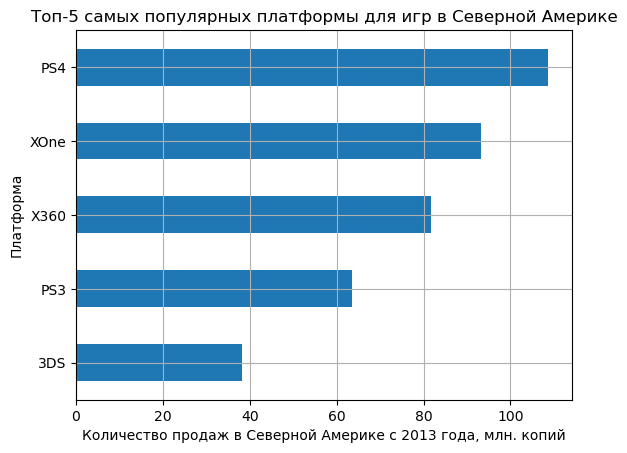

In [38]:
na_platform_pivot = (data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
                     .sort_values(by='na_sales', ascending=True)
                     .tail())
na_platform_pivot.plot(kind='barh', y='na_sales', legend=False, grid=True)
plt.title('Топ-5 самых популярных платформы для игр в Северной Америке')
plt.xlabel('Количество продаж в Северной Америке с 2013 года, млн. копий')
plt.ylabel('Платформа')
plt.show()

In [39]:
na_platform_pivot['share'] = round(na_platform_pivot['na_sales'] / na_platform_pivot['total_sales'], 2)
na_platform_pivot.sort_values(by='na_sales', ascending=False)

,na_sales,total_sales,share
platform,,,
PS4,108.74,314.14,0.35
XOne,93.12,159.32,0.58
X360,81.66,136.80,0.60
PS3,63.50,181.43,0.35
3DS,38.20,143.25,0.27


- Потенциально самые перспективные - самые популярные с 2013 года платформы в СА - `'PS4'` и `'XOne'`
- На платформах `XOne` и `X360` продажи в регионе СА занимают **более половины всех продаж**, а именно 58% и 60% соответственно, это внушительный показатель. Продажи игр на `PS3` и `PS4` 35%, что также значимо

#### Топ-5 самых популярных жанров

Представим топ-5 самых популярных жанров в виде столбчатой диаграммы

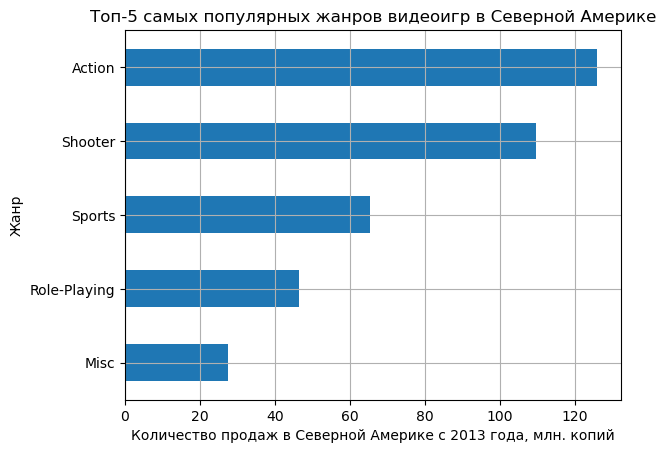

In [40]:
(data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=True).tail()
 .plot(kind='barh', y='na_sales', legend=False, grid=True))
plt.title('Топ-5 самых популярных жанров видеоигр в Северной Америке')
plt.xlabel('Количество продаж в Северной Америке с 2013 года, млн. копий')
plt.ylabel('Жанр')
plt.show()

- Выделенные ранее самые перспективные жанры - `Шутер` и `Спортивный симулятор` занимают 2 и 3 строчки в топ-5 жанров

#### Влияет ли рейтинг ESRB на продажи в Северной Америке?

Для ответа на вопрос сгруппируем данные по рейтингу, посчитаем общее количество продаж игр в каждой категории, а далее визуализируем данные в виде столбчатой диаграммы

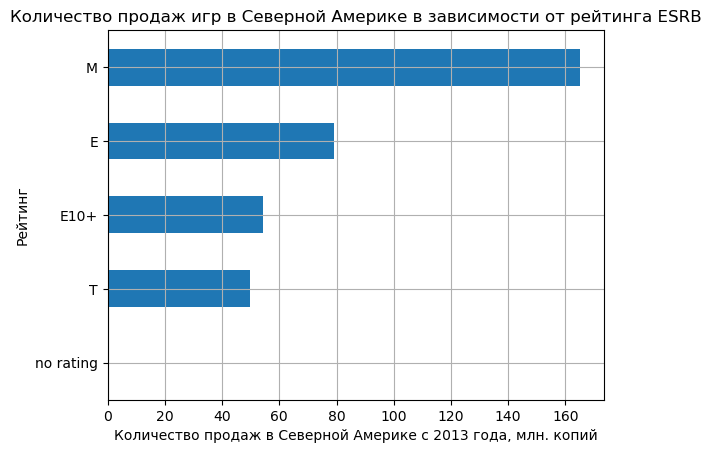

In [41]:
(data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=True)
 .plot(kind='barh', y='na_sales', legend=False, grid=True))
plt.title('Количество продаж игр в Северной Америке в зависимости от рейтинга ESRB')
plt.xlabel('Количество продаж в Северной Америке с 2013 года, млн. копий')
plt.ylabel('Рейтинг')
plt.show()

- Наибольшее количество проданных копий - среди игр с рейтингом `М`, в СА продано **160 млн. копий с 2013 года**. 

### 4.2 Европа

#### 4.2.1 Топ-5 самых популярных платформ

Представим топ-5 самых популярных платформ в виде столбчатой диаграммы, а также в виде таблицы, чтобы посмотреть, какую долю от общего количества продаж на платформе занимают продажи в Европе

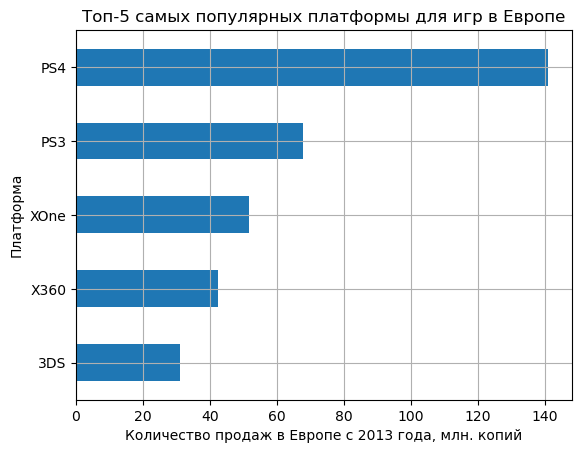

In [42]:
eu_platform_pivot = (data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=True)
                     .tail())
eu_platform_pivot.plot(kind='barh', y='eu_sales', legend=False, grid=True)
plt.title('Топ-5 самых популярных платформы для игр в Европе')
plt.xlabel('Количество продаж в Европе с 2013 года, млн. копий')
plt.ylabel('Платформа')
plt.show()

In [43]:
eu_platform_pivot['share'] = round(eu_platform_pivot['eu_sales'] / eu_platform_pivot['total_sales'], 2)
eu_platform_pivot.sort_values(by='eu_sales', ascending=False)

,eu_sales,total_sales,share
platform,,,
PS4,141.09,314.14,0.45
PS3,67.81,181.43,0.37
XOne,51.59,159.32,0.32
X360,42.52,136.80,0.31
3DS,30.96,143.25,0.22


- Перспективная `PS4` в Европе лидирует по популярности, а `XOne` - 3-я
- На платформе `PS4` доля продаж в Европе составляет 45%, это важный рынок для этой платформы. Доля продаж на платформе `'XOne'` - 32%, что также значимо.

#### Топ-5 самых популярных жанров

Представим топ-5 самых популярных жанров в виде столбчатой диаграммы

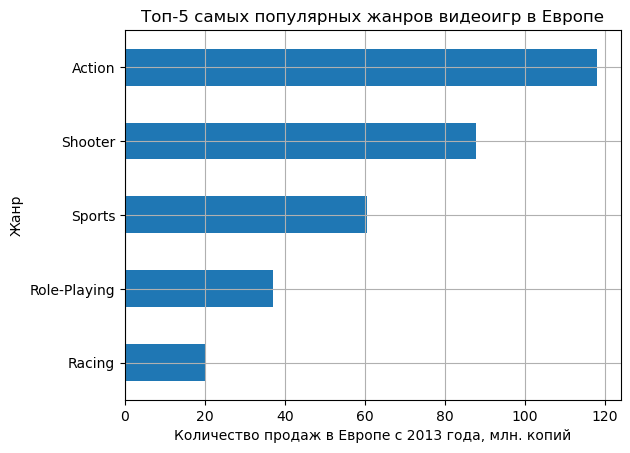

In [44]:
(data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=True).tail()
 .plot(kind='barh', y='eu_sales', legend=False, grid=True))
plt.title('Топ-5 самых популярных жанров видеоигр в Европе')
plt.xlabel('Количество продаж в Европе с 2013 года, млн. копий')
plt.ylabel('Жанр')
plt.show()

- Выделенные ранее самые перспективные жанры - `Шутер` и `Спортивный симулятор` занимают первые 2 и 3 строчки топ-5 жанров

#### Влияет ли рейтинг ESRB на продажи в Европе?

Для ответа на вопрос сгруппируем данные по рейтингу, посчитаем общее количество продаж игр в каждой категории, а далее визуализируем данные в виде столбчатой диаграммы

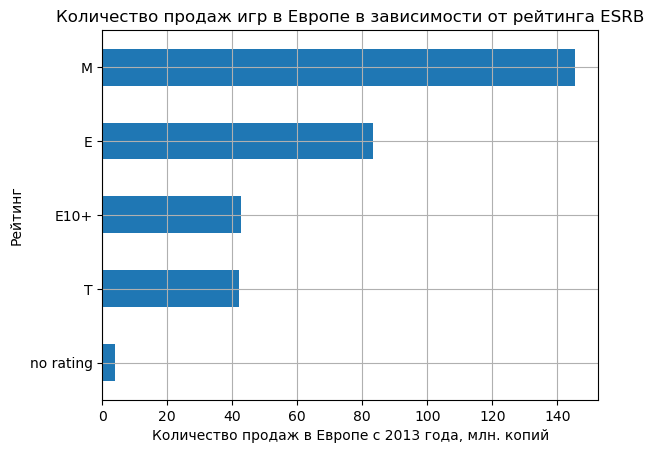

In [45]:
(data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=True)
 .plot(kind='barh', y='eu_sales', legend=False, grid=True))
plt.title('Количество продаж игр в Европе в зависимости от рейтинга ESRB')
plt.xlabel('Количество продаж в Европе с 2013 года, млн. копий')
plt.ylabel('Рейтинг')
plt.show()

- Самым популярным рейтингом является`М`, с таким рейтингом в Европе продано **140 млн. копий с 2013 года**. Ситуация аналогична с СА.

### Япония

#### Топ-5 самых популярных платформ

Представим топ-5 самых популярных платформ в виде столбчатой диаграммы, а также в виде таблицы, чтобы посмотреть, какую долю от общего количества продаж на платформе занимают продажи в Японии

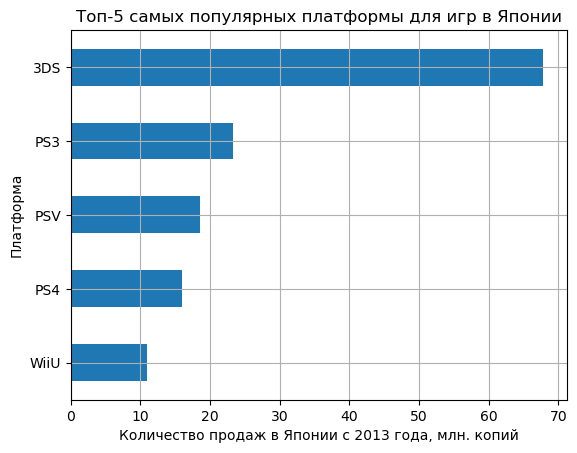

In [46]:
jp_platform_pivot = (data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=True)
                     .tail())
jp_platform_pivot.plot(kind='barh', y='jp_sales', legend=False, grid=True)
plt.title('Топ-5 самых популярных платформы для игр в Японии')
plt.xlabel('Количество продаж в Японии с 2013 года, млн. копий')
plt.ylabel('Платформа')
plt.show()

In [47]:
jp_platform_pivot['share'] = round(jp_platform_pivot['jp_sales'] / jp_platform_pivot['total_sales'], 2)
jp_platform_pivot.sort_values(by='jp_sales', ascending=False)

,jp_sales,total_sales,share
platform,,,
3DS,67.81,143.25,0.47
PS3,23.35,181.43,0.13
PSV,18.59,32.99,0.56
PS4,15.96,314.14,0.05
WiiU,10.88,64.63,0.17


- В Японии самая популярная платформа для игр - `3DS`, ее доля от общих продаж составляет 47% с показателем **65 млн. продаж** в Японии
- На втором месте `PS3`, но ее доля продаж в японии небольшая - 13% от мировых, за ней следует потенциально перспективная `PS4`

#### Топ-5 самых популярных жанров

Представим топ-5 самых популярных жанров в виде столбчатой диаграммы

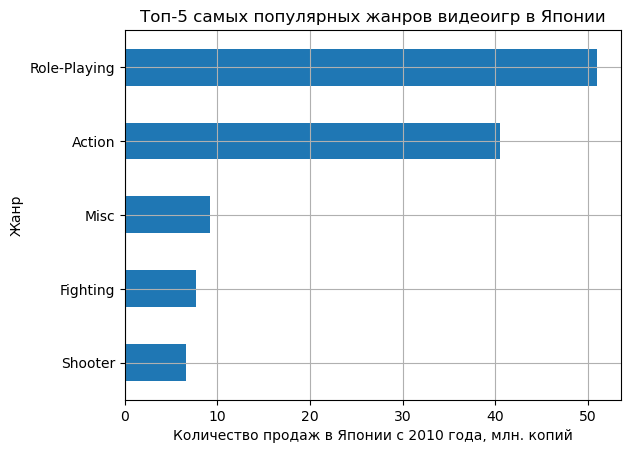

In [48]:
(data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=True).tail()
 .plot(kind='barh', y='jp_sales', legend=False, grid=True))
plt.title('Топ-5 самых популярных жанров видеоигр в Японии')
plt.xlabel('Количество продаж в Японии с 2010 года, млн. копий')
plt.ylabel('Жанр')
plt.show()

- Самый популярный жанр в Японии - `РПГ` с показателем более 50 млн. продаж
- На втором месте `Экшн`, а популярный в Европе и СА Шутер в Японии всего лишь на 5 месте.

#### Влияет ли рейтинг ESRB на продажи в Японии?

Для ответа на вопрос сгруппируем данные по рейтингу, посчитаем общее количество продаж игр в каждой категории, а далее визуализируем данные в виде столбчатой диаграммы

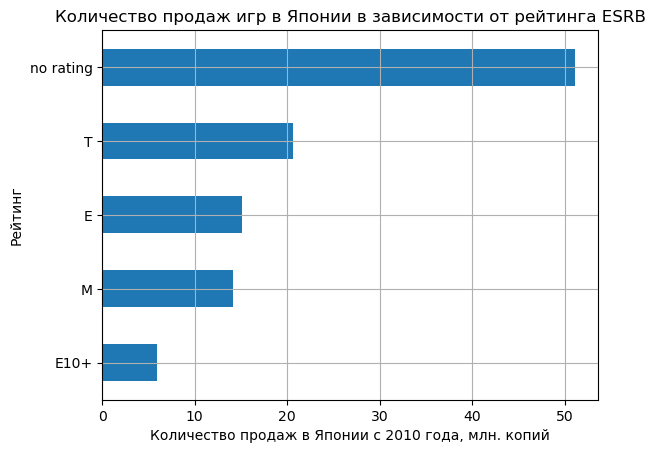

In [49]:
(data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=True)
 .plot(kind='barh', y='jp_sales', legend=False, grid=True))
plt.title('Количество продаж игр в Японии в зависимости от рейтинга ESRB')
plt.xlabel('Количество продаж в Японии с 2010 года, млн. копий')
plt.ylabel('Рейтинг')
plt.show()

- В Японии большинство игр не маркируется рейтингом ESRB

**Общий вывод по Составлению портрета**
- Для Северной Америки и Европы наибольее перспективны продажи игр в жанрах `Шутер` и `Спортивный симулятор`, выпущенные на платформах `XOne`, `PS4`с рейтингом `M`
- Для Японии самым перспективным направлением продаж будут игры для портативной консоли `3DS` в жанре `RPG`

## Проверка статистических гипотез

В ходе исследования нам необходимо выяснить:

- Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

- Отличаются ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)?

### Сравнение пользовательских рейтингов Xbox One и PC

Сформируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза (Н0):** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза (Н1):** Средние пользовательские рейтинги платформ Xbox One и PC не равны

То есть, в результате Т-теста получим p-значение такое, что не сможем отклонить нулевую гипотезу (то есть сможем утверждать, что нулевая гипотеза верна - **Средние пользовательские рейтинги платформ Xbox One и PC равны**), либо получим значение р-значение такое, что сможем отклонить нулевую гипотезу в пользу двусторонней альтернативной - и тогда сможем утверждать, что **Средние пользовательские рейтинги платформ Xbox One и PC не равны**

Так как мы сравниваем средние двух независимых выборок, для проверки гипотезы будем использовать метод `scipy.stats.ttest_ind()`. Уровень статистической значимости **alpha** установим на уровне 0.01

In [50]:
alpha = 0.01

#также удалим пропуски в столбце с оценкой пользователей в сравниваемых выборках
xone = data.query('platform == "XOne"')
xone = xone[~(xone['user_score'].isna())]
pc = data.query('platform == "PC"') 
pc = pc[~(pc['user_score'].isna())]

result = (st.ttest_ind(xone['user_score'], pc['user_score']))

print(f'P-value: {result.pvalue}')
if result.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

P-value: 0.14012658403611647
Не можем отвергнуть нулевую гипотезу


**Не можем отвергнуть** нулевую гипотезу о том, что *Средние пользовательские рейтинги платформ Xbox One и PC равны* в пользу альтернативной о том, что Средние пользовательские рейтинги платформ Xbox One и PC не равны. 

### Сравнение пользовательских рейтингов игр в жанрах Экшн и Спортивные соревнования

Сформируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза (Н0):** Средние пользовательские рейтинги игр по жанрам Экшн и Спортивные соревнования равны

**Альтернативная гипотеза (Н1):** Средние пользовательские рейтинги игр по жанрам Экшн и Спортивные соревнования не равны

То есть, в результате Т-теста получим p-значение такое, что не сможем отклонить нулевую гипотезу (то есть сможем утверждать, что нулевая гипотеза верна - **Средние пользовательские рейтинги игр по жанрам Экшн и Спортивные соревнования равны**), либо получим р-значение такое, что сможем отклонить нулевую гипотезу в пользу двусторонней альтернативной - и тогда сможем утверждать, что **Средние пользовательские рейтинги игр по жанрам Экшн и Спортивные соревнования равны**

Так как мы сравниваем средние двух независимых выборок, для проверки гипотезы будем использовать метод `scipy.stats.ttest_ind()`. Уровень статистической значимости **alpha** установим на уровне 0.01

In [51]:
action_games = data.query('genre == "Action"')
action_games = action_games[~(action_games['user_score'].isna())]
sports_games = data.query('genre == "Sports"')
sports_games = sports_games[~(sports_games['user_score'].isna())]


result = st.ttest_ind(action_games['user_score'], sports_games['user_score'])

print(f'P-value: {result.pvalue}')
if result.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

P-value: 1.0517832389140023e-27
Можем отвергнуть нулевую гипотезу


**Можем отвергнуть** нулевую гипотезу *о равенстве Средних пользовательских рейтингов жанров Action и Sports* в пользу альтернативной о том, что отличаются.

**Вывод по Проверке статистических гипотез:**

- **Не можем отвергнуть** нулевую гипотезу о том, что *Средние пользовательские рейтинги платформ Xbox One и PC равны* в пользу альтернативной о том, что Средние пользовательские рейтинги платформ Xbox One и PC не равны. 
- **Можем отвергнуть** нулевую гипотезу *о равенстве Средних пользовательских рейтингов жанров Action и Sports* в пользу альтернативной о том, что отличаются.

## Общий вывод 

### Предобработка данных

- Названия столбцов приведены к нижнему регистру
- Пропуски, скорее всего, возникли случайно, кроме пропусков в `'rating'`
- Пропущенные значения в столбцах `'name'`, `'year_of_release'`, `'genre'` удалены.
- Пропущенные значения в столбцах `'critic_score'`, `'user_score'` оставили как есть, так как их замена могла исказить результаты исследования
- Пропуски в столбце  `'rating'` заполнены заглушкой, так как возникли из-за того, что рейтинг присваивается только в определенном регионе
- Значения `'tbd'` столбца `'user_score'` заменены на пропуски, так как это обозначение `'подлежит уточнению'`
- В данных отсутствуют явные и неявные дубликаты
- Обработаны типы данных
- Добавлен столбец `'total_sales'`, который хранит общую выручку со всех регионов

### Исследовательский анализ данных

- Количество выпускаемых ежегодно игр: 
    - С 1990 года до 2008-2009 года количество выпускаемых игр росло с каждым годом
    - После 2001 (500 выпущенных игр) года начался резкий рост до 1450 в 2009
    - С 2009 до 2012 года количество выпускаемых ежегодно игр стало снижаться
    - С 2012 по 2016 количество ежегодно выпускаемых игр около 600 в год.
 - "Срок жизни" Платформы составляет примерно 5 лет, обычно он длится с 2-го года продаж по 7-й, и продается по 100 млн. копий игр и более. После 7-го года количество продаж сильно сокращается.
- Актуальный период для исследования: 2010-2016 годы
- Самые перспективные платформы для продаж в 2017 - `PS4` и `XOne`. Платформы Старших поколений - PS3, X360 сильно упали в продажах.
- Отзывы пользователей **почти не влияют** на количество продаж. Положительные отзывы критиков, хоть и **достаточно слабо, но влияют** на количество продаж продукта.
- Медианное значение продаж на популярных платформах - **примерно 0.25 млн. копий**, а 75% (3-й квартиль) в районе **0.75 млн.** Для *стабильно популярных платформ* большинство значений продаж больше 1 млн. - в большинстве случаев около **1.75 млн. копий** (3-й квартиль плюс 1.5 сигмы)
- Самые перспективные и популярные жанры - `'Экшн'`, `Шутер` и `Спортивный симулятор`

### Тренды популярности видеогр по регионам

- Для Северной Америки и Европы наибольшей популярностью пользуются игры в жанрах `Экшн` и `Шутер`, а также `Спортивный симулятор`, выпущенные на платформах `XOne`, `PS4`с рейтингом `M` 
- В Японии наибольшей популярностью пользуются портативные консоли, самая популярная из них - `3DS`, а самый популярные жанры - `RPG` и `Экшн`

### Проверка статистических гипотез

- **Не можем отвергнуть** нулевую гипотезу о том, что *Средние пользовательские рейтинги платформ Xbox One и PC равны* в пользу альтернативной о том, что Средние пользовательские рейтинги платформ Xbox One и PC не равны. 
- **Можем отвергнуть** нулевую гипотезу *о равенстве Средних пользовательских рейтингов жанров Action и Sports* в пользу альтернативной о том, что отличаются.

### Рекомендации на 2017 год

- Для Северной Америки и Европы самым перспективным направлением будет продажа игр в жанрах `Шутер` и `Спортивный симулятор`, выпущенные на платформах `XOne`, `PS4`с рейтингом `M` для более стабильных продаж, а также `Экшн`, если ожидать хит
- Для Японии самым перспективным направлением продаж будут игры для портативной консоли `3DS` в жанре `RPG`, а также `Экшн`, если ожидать хит